# Data Analysis on IBM HR Analytics 
--- 
**Author:** Jaylon Kiper & Sheridan Payne 
**Semester:** Spring 2021  
**Summary:**

This project has two goals: applying the exploratory analysis techniques we have learned this
semester to prepare a dataset and implementing a machine learning (ML) model for which there is a package in Python
or R.

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('IBM_Employee.csv')

In [3]:
df['Attrition']=df['Attrition'].apply(lambda x: 1 if x!='No' else 0)

In [4]:
df

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,2,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,4,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,5,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,...,Excellent,High,0,8,3,Better,8,7,3,0
4,7,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,...,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,0,Travel_Frequently,884,Research & Development,23,College,Medical,High,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,2062,39,0,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,2064,27,0,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,2065,49,0,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,...,Excellent,Very High,0,17,3,Good,9,6,0,8


## Exploratory Analysis

In [5]:
df.dtypes

EmployeeNumber               int64
Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany      

In [6]:
df.describe()

,EmployeeNumber,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,0.161224,802.485714,9.192517,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,0.367863,403.509100,8.106864,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,0.000000,465.000000,2.000000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,0.000000,802.000000,7.000000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,0.000000,1157.000000,14.000000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,1.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.corr()

,EmployeeNumber,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,1.000000,-0.010145,-0.010577,-0.050990,0.032916,0.035179,-0.018519,-0.014829,0.012648,-0.001251,-0.012944,0.062227,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
Age,-0.010145,1.000000,-0.159205,0.010661,-0.001686,0.024287,0.509604,0.497855,0.028051,0.299635,0.003634,0.037510,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
Attrition,-0.010577,-0.159205,1.000000,-0.056652,0.077924,-0.006846,-0.169105,-0.159840,0.015170,0.043494,-0.013478,-0.137145,-0.171063,-0.059478,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,-0.050990,0.010661,-0.056652,1.000000,-0.004985,0.023381,0.002966,0.007707,-0.032182,0.038153,0.022704,0.042143,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032916,-0.001686,0.077924,-0.004985,1.000000,0.031131,0.005303,-0.017014,0.027473,-0.029251,0.040235,0.044872,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.035179,0.024287,-0.006846,0.023381,0.031131,1.000000,-0.027853,-0.015794,-0.015297,0.022157,-0.009062,0.050263,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
JobLevel,-0.018519,0.509604,-0.169105,0.002966,0.005303,-0.027853,1.000000,0.950300,0.039563,0.142501,-0.034730,0.013984,0.782208,-0.018191,0.534739,0.389447,0.353885,0.375281
MonthlyIncome,-0.014829,0.497855,-0.159840,0.007707,-0.017014,-0.015794,0.950300,1.000000,0.034814,0.149515,-0.027269,0.005408,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.012648,0.028051,0.015170,-0.032182,0.027473,-0.015297,0.039563,0.034814,1.000000,0.017521,-0.006429,-0.034323,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,-0.001251,0.299635,0.043494,0.038153,-0.029251,0.022157,0.142501,0.149515,0.017521,1.000000,-0.010238,0.030075,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319


<AxesSubplot:>

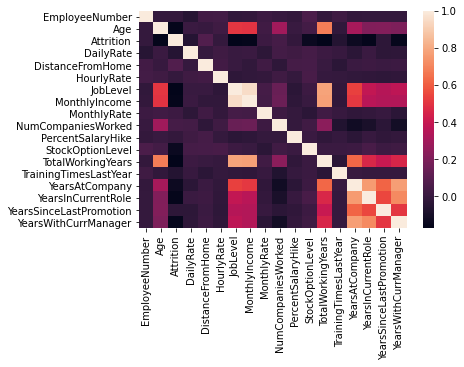

In [8]:
fig = plt.figure()
sns.heatmap(df.corr())

<AxesSubplot:title={'center':'Education Level of IBM Employees'}, ylabel='Education Level'>

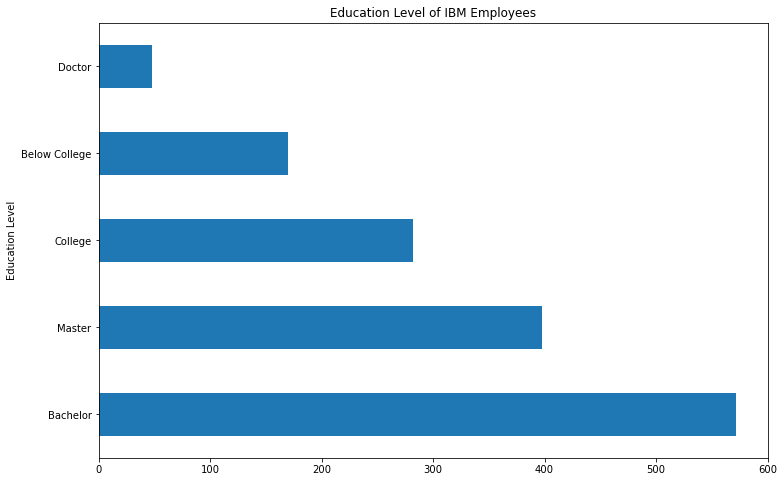

In [9]:
fig = plt.figure(figsize=(12,8))
df['Education'].value_counts().plot(kind='barh',title='Education Level of IBM Employees',xlabel='Education Level')

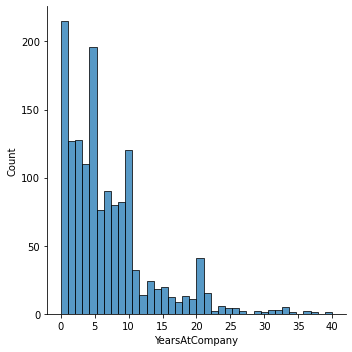

In [10]:
sns.displot(df['YearsAtCompany'])

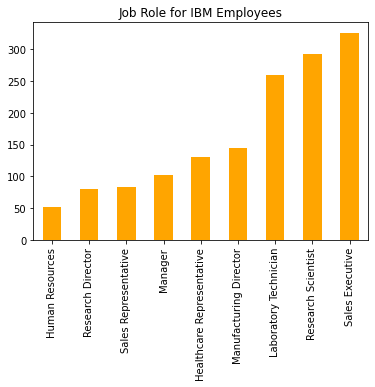

In [11]:
plt.title('Job Role for IBM Employees')
plt_plot = df['JobRole'].value_counts().sort_values().plot(kind='bar', color = 'orange')

## Machine Learning Analysis

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X = np.array(df[['DailyRate','HourlyRate','PercentSalaryHike','YearsAtCompany']])
y = np.array(df['Attrition'])

## Raw/Normal with 80/10/10

In [14]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.80, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.10, random_state=42)

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
y_validate_pred = knn_model.predict(x_validate)

In [18]:
y_validate_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [20]:
y_pred = knn_model.predict(x_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

print(accuracy, precision, recall, f1)

0.788135593220339 0.14285714285714285 0.05 0.07407407407407408


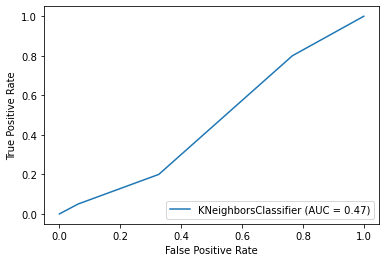

In [21]:
roc = metrics.plot_roc_curve(knn_model,x_test, y_test)

In [22]:
y_score = knn_model.predict_proba(x_test)[:,1]
y_score

array([0.2, 0.2, 0. , 0.2, 0.2, 0.2, 0. , 0.4, 0. , 0.4, 0.2, 0. , 0.2,
       0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0. , 0.4, 0. , 0.2, 0.4, 0.4, 0.4,
       0.4, 0. , 0.2, 0. , 0. , 0.2, 0. , 0.2, 0. , 0.2, 0.4, 0.4, 0.2,
       0.6, 0.2, 0. , 0.4, 0.4, 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6,
       0.6, 0.4, 0. , 0. , 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.2, 0. , 0. ,
       0.2, 0. , 0.2, 0.4, 0.4, 0.2, 0.4, 0. , 0.4, 0.2, 0.2, 0.2, 0.4,
       0.2, 0. , 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0. , 0.4, 0.2, 0.2, 0.2,
       0.2, 0.4, 0. , 0.2, 0.2, 0. , 0. , 0.2, 0.2, 0.4, 0.6, 0.4, 0. ,
       0.2, 0.4, 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0.4, 0.2, 0.6, 0.6, 0.2,
       0.4])

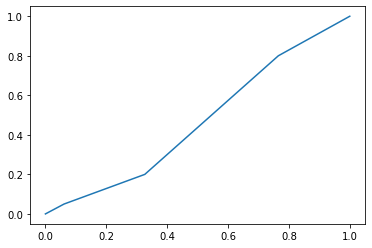

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)
plt.plot(fpr,tpr)

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train,y_train)

y_pred = clf.predict(x_validate)

accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

print(accuracy, precision, recall, f1)

0.8251417769376181 0.09375 0.018867924528301886 0.031413612565445025


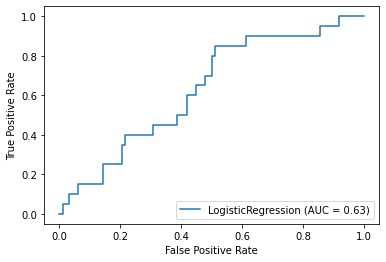

In [25]:
roc = metrics.plot_roc_curve(clf,x_test, y_test)

In [26]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

lr_model = LogisticRegression().fit(x_train,y_train)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

scores =cross_val_score(lr_model, x_validate, y_validate, cv=10)

scores

array([0.8490566 , 0.8490566 , 0.8490566 , 0.8490566 , 0.8490566 ,
       0.8490566 , 0.8490566 , 0.8490566 , 0.85714286, 0.84761905])

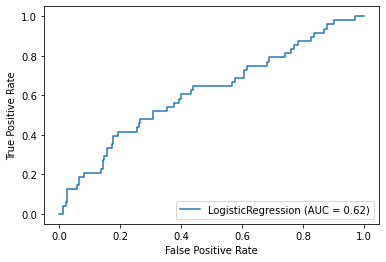

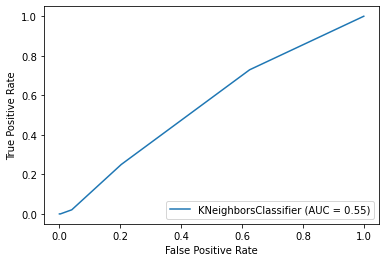

In [27]:
metrics.plot_roc_curve(lr_model,x_test, y_test)
metrics.plot_roc_curve(knn_model,x_test, y_test)

## Raw/Normal with 70/15/15

In [28]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.70, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.15, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_validate_pred = knn_model.predict(x_validate)

y_validate_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [31]:
y_pred = knn_model.predict(x_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

print(accuracy, precision, recall, f1)

0.832258064516129 0.0 0.0 0.0


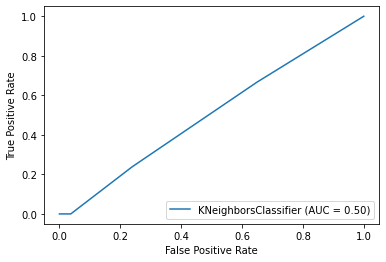

In [32]:
roc = metrics.plot_roc_curve(knn_model,x_test, y_test)

In [33]:
y_score = knn_model.predict_proba(x_test)[:,1]
y_score

array([0. , 0. , 0.2, 0. , 0.4, 0. , 0.2, 0.4, 0. , 0.2, 0.2, 0.2, 0.4,
       0.2, 0. , 0.4, 0.2, 0.2, 0.4, 0. , 0.2, 0.2, 0.4, 0. , 0. , 0.2,
       0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0.2, 0.4, 0.6, 0.4,
       0.4, 0.2, 0.2, 0.4, 0.4, 0. , 0. , 0.2, 0.4, 0.6, 0. , 0.4, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0.2, 0.4, 0.4, 0. , 0. ,
       0. , 0.2, 0. , 0.2, 0.2, 0. , 0.2, 0. , 0.6, 0. , 0.2, 0.4, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.4,
       0.2, 0.2, 0. , 0.4, 0.2, 0. , 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0. ,
       0.2, 0.2, 0. , 0.4, 0.4, 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0.4,
       0.6, 0.2, 0.2, 0. , 0.2, 0.2, 0.4, 0. , 0.4, 0.4, 0.2, 0.4, 0.2,
       0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.4, 0. , 0.4, 0. , 0. , 0.4,
       0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0. , 0. , 0. , 0.2])

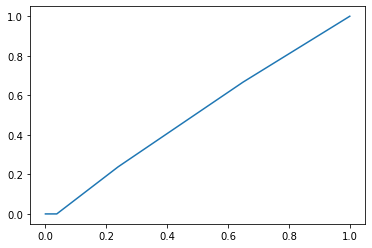

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)
plt.plot(fpr,tpr)

In [35]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train,y_train)

y_pred = clf.predict(x_validate)

accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

print(accuracy, precision, recall, f1)

0.8249427917620137 0.19047619047619047 0.02857142857142857 0.049689440993788817


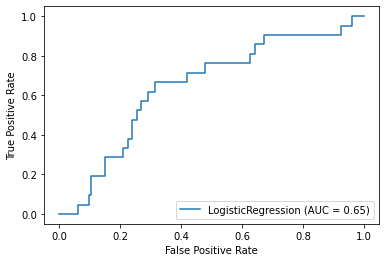

In [36]:
roc = metrics.plot_roc_curve(clf,x_test, y_test)

In [37]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

lr_model = LogisticRegression().fit(x_train,y_train)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

scores =cross_val_score(lr_model, x_validate, y_validate, cv=10)

scores

array([0.84090909, 0.84090909, 0.84090909, 0.84090909, 0.83908046,
       0.83908046, 0.83908046, 0.83908046, 0.83908046, 0.83908046])

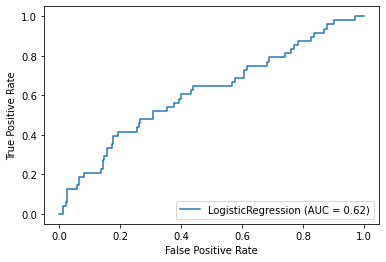

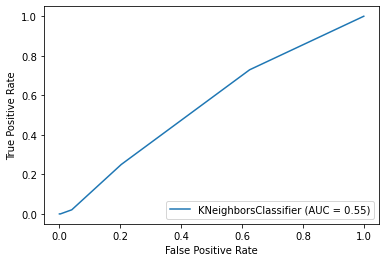

In [38]:
metrics.plot_roc_curve(lr_model,x_test, y_test)
metrics.plot_roc_curve(knn_model,x_test, y_test)

## Raw/Normal with 50/25/25

In [39]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.50, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.25, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_validate_pred = knn_model.predict(x_validate)
y_validate_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [42]:
y_pred = knn_model.predict(x_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

print(accuracy, precision, recall, f1)

0.8260869565217391 0.1 0.041666666666666664 0.058823529411764705


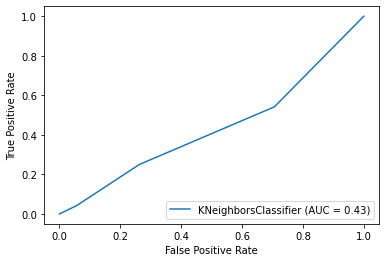

In [43]:
roc = metrics.plot_roc_curve(knn_model,x_test, y_test)

In [44]:
y_score = knn_model.predict_proba(x_test)[:,1]
y_score

array([0. , 0. , 0.4, 0.4, 0.4, 0.6, 0.2, 0.4, 0. , 0.2, 0.2, 0.2, 0. ,
       0.2, 0. , 0.6, 0. , 0.4, 0.2, 0.4, 0.4, 0.2, 0. , 0. , 0.4, 0.2,
       0.2, 0. , 0.2, 0.2, 0.6, 0. , 0. , 0. , 0.2, 0.2, 0.2, 0. , 0. ,
       0.2, 0.4, 0. , 0.2, 0.4, 0. , 0.2, 0.2, 0. , 0.2, 0. , 0.4, 0. ,
       0. , 0.4, 0. , 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0. , 0.2, 0. , 0.2,
       0.4, 0.4, 0. , 0.2, 0.2, 0.4, 0. , 0.2, 0.4, 0. , 0. , 0. , 0.2,
       0.2, 0.2, 0.2, 0.4, 0. , 0.2, 0.2, 0. , 0. , 0.6, 0.2, 0.4, 0.2,
       0.4, 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0.4, 0. , 0.4, 0.2, 0.2,
       0.2, 0.2, 0.2, 0. , 0.4, 0.2, 0.2, 0. , 0.4, 0.2, 0.2, 0.4, 0.4,
       0.2, 0. , 0. , 0.4, 0.2, 0.2, 0.6, 0.2, 0.2, 0. , 0.2, 0.2, 0. ,
       0.2, 0.2, 0.4, 0.2, 0.6, 0.2, 0.2, 0. , 0.4, 0.4, 0.2, 0. , 0.4,
       0.4, 0.4, 0. , 0.4, 0.4, 0.2, 0.6, 0. , 0.2, 0.6, 0.2, 0. , 0.2,
       0. , 0.2, 0. , 0.2, 0. , 0.2, 0.4, 0.2, 0.2, 0.6, 0. , 0. , 0.2,
       0.2, 0.2, 0. , 0.2, 0. , 0.2, 0.2, 0. , 0. , 0. , 0.2, 0.

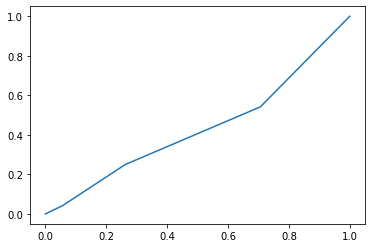

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)
plt.plot(fpr,tpr)

In [46]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train,y_train)

y_pred = clf.predict(x_validate)

accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

print(accuracy, precision, recall, f1)

0.8366606170598911 0.1875 0.0375 0.06249999999999999


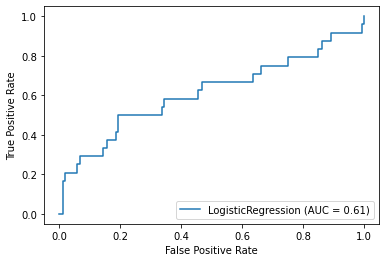

In [47]:
roc = metrics.plot_roc_curve(clf,x_test, y_test)

In [48]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

lr_model = LogisticRegression().fit(x_train,y_train)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

scores =cross_val_score(lr_model, x_validate, y_validate, cv=10)

scores

array([0.85714286, 0.85454545, 0.85454545, 0.85454545, 0.85454545,
       0.85454545, 0.85454545, 0.85454545, 0.85454545, 0.85454545])

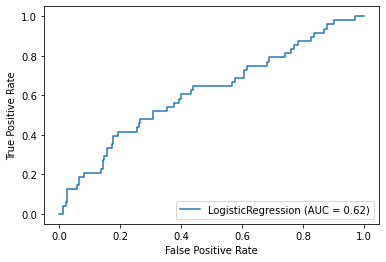

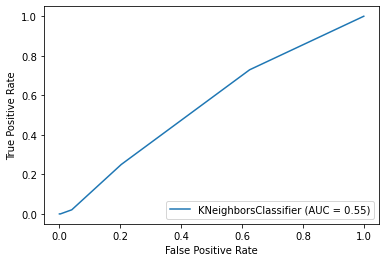

In [49]:
metrics.plot_roc_curve(lr_model,x_test, y_test)
metrics.plot_roc_curve(knn_model,x_test, y_test)